In [42]:
import time
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
import sys
import os
import numpy as np
import itertools
import seaborn as sns

sys.path.insert(0, os.path.join(os.getcwd(), "..", "kNN_NBC", "x64", "Release"))
import pynbc

# Performance test
100, 1000, 10000, 100000 - samples

2, 4, 8, 16, 32 - dimension

10 - k

In [2]:
def test_kNN(samples, dimension, k, parallel) :
    print(f"KNN Test: {samples} samples, {dimension} dimension, k={k}, parallel: {parallel}")
    dataset = make_blobs(n_samples = samples, centers = int(samples ** 0.5), n_features = dimension, random_state = 12345)
    
    start = time.time()
    pynbc.nbc_kNN(k, 0, dataset[0], parallel)
    end = time.time()
    return end - start;


In [3]:
def test_kpNN(samples, dimension, k, parallel) :
    print(f"K+NN Test: {samples} samples, {dimension} dimension, k={k}, parallel: {parallel}")
    dataset = make_blobs(n_samples = samples, centers = int(samples ** 0.5), n_features = dimension, random_state = 12345)
    
    start = time.time()
    pynbc.nbc_kpNN(k, 0, dataset[0], parallel)
    end = time.time()
    return end - start;


In [4]:
samples = [100, 1000, 10000, 100000]
dims = [2, 4, 8, 16, 32]
ks = [10]
parallel = [False, True]
params = list(itertools.product(samples, dims, ks, parallel))
n_tries = 3

In [5]:
results_kNN = [
    [test_kNN(s, d, k, p) for _ in range(n_tries)] for s, d, k, p in params
]

KNN Test: 100 samples, 2 dimension, k=10, parallel: False
KNN Test: 100 samples, 2 dimension, k=10, parallel: False
KNN Test: 100 samples, 2 dimension, k=10, parallel: False
KNN Test: 100 samples, 2 dimension, k=10, parallel: True
KNN Test: 100 samples, 2 dimension, k=10, parallel: True
KNN Test: 100 samples, 2 dimension, k=10, parallel: True
KNN Test: 100 samples, 4 dimension, k=10, parallel: False
KNN Test: 100 samples, 4 dimension, k=10, parallel: False
KNN Test: 100 samples, 4 dimension, k=10, parallel: False
KNN Test: 100 samples, 4 dimension, k=10, parallel: True
KNN Test: 100 samples, 4 dimension, k=10, parallel: True
KNN Test: 100 samples, 4 dimension, k=10, parallel: True
KNN Test: 100 samples, 8 dimension, k=10, parallel: False
KNN Test: 100 samples, 8 dimension, k=10, parallel: False
KNN Test: 100 samples, 8 dimension, k=10, parallel: False
KNN Test: 100 samples, 8 dimension, k=10, parallel: True
KNN Test: 100 samples, 8 dimension, k=10, parallel: True
KNN Test: 100 samples,

In [6]:
results_kpNN = [
    [test_kpNN(s, d, k, p) for _ in range(n_tries)] for s, d, k, p in params
]

K+NN Test: 100 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100 samples, 8 dimension, k=10, parallel: True
K+NN Test: 100 samples, 8 dimension, k=10, parallel: True
K+NN 

In [13]:
list(zip(params, zip(np.mean(results_kNN, axis=1), np.std(results_kNN, axis=1))))

[((100, 2, 10, False), (0.0009907881418863933, 2.1574210194191443e-05)),
 ((100, 2, 10, True), (0.0013384819030761719, 0.00047154256763346007)),
 ((100, 4, 10, False), (0.0016717910766601562, 0.00047255215959491107)),
 ((100, 4, 10, True), (0.0003341833750406901, 0.00047260666130215836)),
 ((100, 8, 10, False), (0.0026744206746419272, 0.00047277646104902047)),
 ((100, 8, 10, True), (0.001337130864461263, 0.00047333745686533793)),
 ((100, 16, 10, False), (0.003676732381184896, 0.0004727752587156595)),
 ((100, 16, 10, True), (0.0020058155059814453, 5.150429962800233e-07)),
 ((100, 32, 10, False), (0.006685415903727214, 0.0004728314444942165)),
 ((100, 32, 10, True), (0.0026743412017822266, 0.0009467868049487235)),
 ((1000, 2, 10, False), (0.016712745030721027, 0.0004731126737921485)),
 ((1000, 2, 10, True), (0.007017771402994792, 0.0008168298306861501)),
 ((1000, 4, 10, False), (0.03208613395690918, 0.002166307744532525)),
 ((1000, 4, 10, True), (0.00935832659403483, 0.001703540042450387

In [14]:
list(zip(params, zip(np.mean(results_kpNN, axis=1), np.std(results_kpNN, axis=1))))

[((100, 2, 10, False), (0.0010026295979817708, 2.9736021254650284e-07)),
 ((100, 2, 10, True), (0.0010030269622802734, 0.00040928968717250213)),
 ((100, 4, 10, False), (0.0015041828155517578, 5.150429962800233e-07)),
 ((100, 4, 10, True), (0.0010016759236653645, 1.1069288474070327e-06)),
 ((100, 8, 10, False), (0.002506415049235026, 0.00040958176212886876)),
 ((100, 8, 10, True), (0.0011693636576334636, 0.00023658430964115183)),
 ((100, 16, 10, False), (0.0036764144897460938, 0.00023652861451792828)),
 ((100, 16, 10, True), (0.0021730264027913413, 0.0004724381641475821)),
 ((100, 32, 10, False), (0.006350199381510417, 0.00047446472679499936)),
 ((100, 32, 10, True), (0.0030082066853841147, 0.0007089662946551084)),
 ((1000, 2, 10, False), (0.017547130584716797, 0.00040948435497861253)),
 ((1000, 2, 10, True), (0.007355451583862305, 0.0013183880151576407)),
 ((1000, 4, 10, False), (0.03559605280558268, 0.0035680127373271062)),
 ((1000, 4, 10, True), (0.010862986246744791, 0.0023980507653

In [18]:
def get_mean_time(results, parallelisation):
    return np.mean([r for (_, _, _, p), r in zip(params, results) if p == parallelisation], axis=1)

In [45]:
def show_heatmap(values, title, log_scale=False):
    sns.heatmap(
        np.reshape(values, (len(samples), len(dims))),
        annot=True, xticklabels=samples, yticklabels=dims,
        norm=LogNorm(vmin=values.min(), vmax=values.max()) if log_scale else None,
        cbar_kws={'ticks': LogLocator()} if log_scale else None
    )
    plt.xlabel('dimensions')
    plt.ylabel('samples')
    plt.title(title)
    plt.show()

def show_results_heatmap(results, results_label, parallelisation):
    values = get_mean_time(results, parallelisation)
    title = f'{results_label}\n{"With" if parallelisation else "Without"} parallelisation'
    show_heatmap(values, title, True)

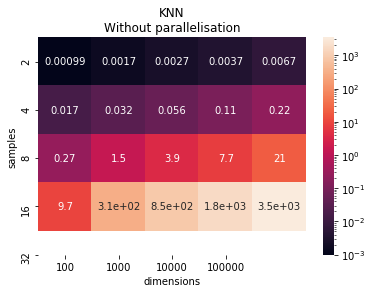

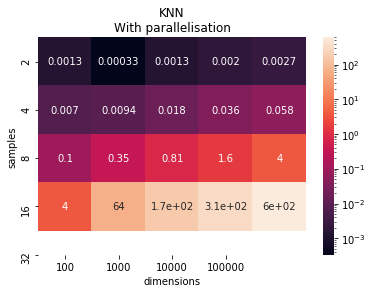

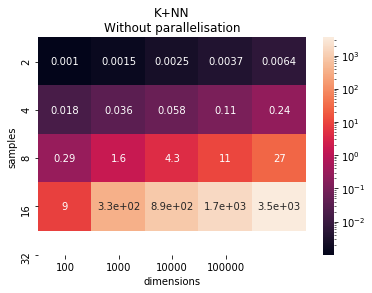

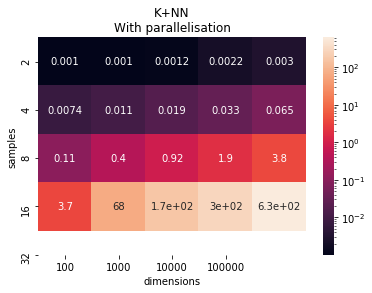

In [46]:
show_results_heatmap(results_kNN, 'KNN', False)
show_results_heatmap(results_kNN, 'KNN', True)
show_results_heatmap(results_kpNN, 'K+NN', False)
show_results_heatmap(results_kpNN, 'K+NN', True)

In [23]:
def show_parallelisation_speed_increase_heatmap(results, alg_name):
    ratio = get_mean_time(results, False) / get_mean_time(results, True)
    title = f'{alg_name}\nParallelisation speed increase'
    show_heatmap(ratio, title)

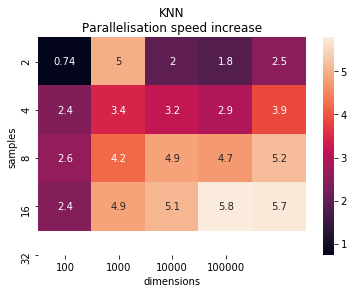

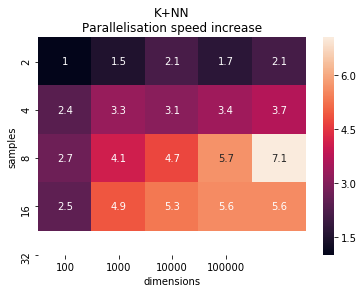

In [47]:
show_parallelisation_speed_increase_heatmap(results_kNN, 'KNN')
show_parallelisation_speed_increase_heatmap(results_kpNN, 'K+NN')

In [11]:
import pickle

with open('results.pickle', 'wb') as file:
    pickle.dump((results_kNN, results_kpNN), file)